In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense


mnist = tf.keras.datasets.mnist



In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#conv layers
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1),activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#fully connected layers
model.add(Flatten())  
model.add(Dense(64,activation='relu'))

model.add(Dense(10,activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
# Reshaping to format which CNN expects (batch, height, width, channels)
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28, 1)

In [ ]:

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 23s 4ms/step - loss: 0.2360 - accuracy: 0.9279
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0783 - accuracy: 0.9757
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0555 - accuracy: 0.9828
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0443 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0365 - accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0301 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0253 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0220 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0194 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

In [ ]:
#inference

In [ ]:
test_image=X_test[300]

In [ ]:
#test_image.shape

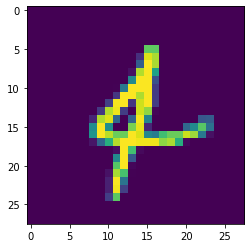

In [ ]:
plt.imshow(test_image.reshape(28,28))

In [ ]:
test_image = image.img_to_array(test_image)

In [ ]:
#predict expect a batch of images...we add a dummy dimension
test_image = test_image.reshape(1,28,28,1)


In [ ]:
result = model.predict(test_image)

In [ ]:
result

array([[5.5978138e-09, 4.0137484e-06, 2.3934217e-07, 9.3959074e-10,
        9.9999154e-01, 7.1813222e-09, 3.8886170e-09, 2.9262837e-06,
        1.0573926e-06, 1.5672539e-07]], dtype=float32)

In [ ]:
result.argmax()

4